# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

## Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    - Scale the features either by using normalizer or a standard scaler.
    - Split the data into a training set and a test set.
    - Fit a logistic regression model on the training data.
    - Check the accuracy on the test data.

Note: So far we have not balanced the data.

## Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [1]:
# Import the required libraries and modules that you would need.

import pandas as pd
import numpy as np
import statistics
from sklearn.impute import KNNImputer
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read that data into Python and call the dataframe churnData.

churnData = pd.read_csv('customer-churn.csv')

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churnData.shape

(7043, 16)

In [5]:
# Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. 

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Convert this column into numeric type using pd.to_numeric function.

churnData['TotalCharges'] = churnData['TotalCharges'].apply(pd.to_numeric, errors='coerce')
churnData['TotalCharges'].dtype

dtype('float64')

In [7]:
#fixing column names

churnData= churnData.rename(columns=str.lower)

In [8]:
churnData = churnData.rename(columns={'seniorcitizen': 'senior_citizen', 'phoneservice': 'phone_service', 'onlinebackup':'online_backup', 'deviceprotection':'device_protection', 'techsupport':'tech_support', 'streamingtv':'streaming_tv', 'streamingmovies':'streaming_movies', 'monthlycharges':'monthly_charges','totalcharges':'total_charges', 'onlinesecurity':'online_security'})

In [9]:
# Check for null values in the dataframe.

churnData.isnull().sum()/len(churnData)

gender               0.000000
senior_citizen       0.000000
partner              0.000000
dependents           0.000000
tenure               0.000000
phone_service        0.000000
online_security      0.000000
online_backup        0.000000
device_protection    0.000000
tech_support         0.000000
streaming_tv         0.000000
streaming_movies     0.000000
contract             0.000000
monthly_charges      0.000000
total_charges        0.001562
churn                0.000000
dtype: float64

In [10]:
df_nan = churnData[['monthly_charges','total_charges']].copy()
df_nan[df_nan['total_charges'].isna()]

,monthly_charges,total_charges
488,52.55,NaN
753,20.25,NaN
936,80.85,NaN
1082,25.75,NaN
1340,56.05,NaN
3331,19.85,NaN
3826,25.35,NaN
4380,20.00,NaN
5218,19.70,NaN
6670,73.35,NaN


In [11]:
#Replace the null values.

imputer = KNNImputer(n_neighbors=4, weights='uniform', metric='nan_euclidean')
imputed = imputer.fit_transform(df_nan)
df_imputed = pd.DataFrame(imputed, columns=df_nan.columns)
df_imputed['total_charges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [12]:
churnData['total_charges'] = df_imputed['total_charges']
churnData.isnull().sum()/len(churnData)

gender               0.0
senior_citizen       0.0
partner              0.0
dependents           0.0
tenure               0.0
phone_service        0.0
online_security      0.0
online_backup        0.0
device_protection    0.0
tech_support         0.0
streaming_tv         0.0
streaming_movies     0.0
contract             0.0
monthly_charges      0.0
total_charges        0.0
churn                0.0
dtype: float64

In [13]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges

In [14]:
X = churnData[['tenure', 'senior_citizen', 'monthly_charges', 'total_charges']]
y = churnData[['churn']]

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   senior_citizen   7043 non-null   int64  
 2   monthly_charges  7043 non-null   float64
 3   total_charges    7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


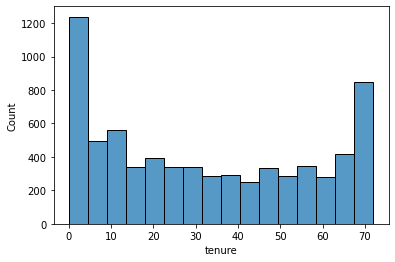

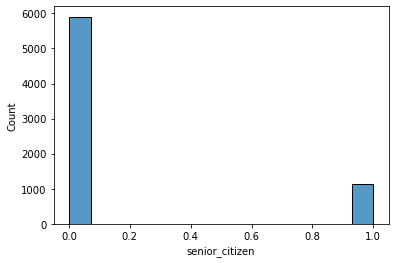

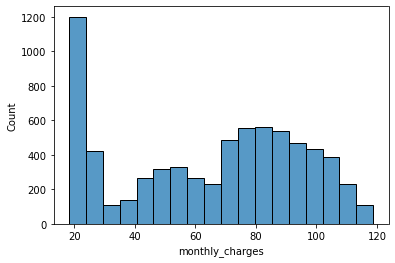

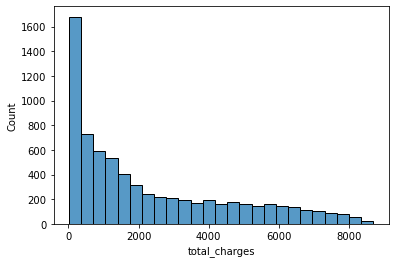

<Figure size 432x288 with 0 Axes>

In [16]:
for i in X.columns:
    sns.histplot(churnData[i])
    plt.figure()

In [17]:
# Scale the features either by using normalizer or a standard scaler.

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,tenure,senior_citizen,monthly_charges,total_charges
0,-1.277445,-0.439916,-1.160323,-0.994057
1,0.066327,-0.439916,-0.259629,-0.173159
2,-1.236724,-0.439916,-0.362660,-0.959494
3,0.514251,-0.439916,-0.746535,-0.194678
4,-1.236724,-0.439916,0.197365,-0.940292
...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.128575
7039,1.613701,-0.439916,1.277533,2.242944
7040,-0.870241,-0.439916,-1.168632,-0.854302
7041,-1.155283,2.273159,0.320338,-0.871893


In [18]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   churn   7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [19]:
#Fit a logistic regression model on the training data.

X_train, X_test, y_train, y_test = train_test_split \
            (X, y, test_size=0.2, random_state=42)

In [20]:
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)

Confusion matrix
[[959 195]
 [ 77 178]]
-------------------------------------------------------
Accuracy score
0.8069552874378992
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.93      0.83      0.88      1154
         Yes       0.48      0.70      0.57       255

    accuracy                           0.81      1409
   macro avg       0.70      0.76      0.72      1409
weighted avg       0.84      0.81      0.82      1409



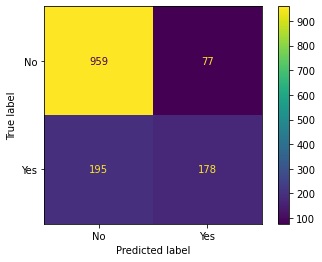

In [21]:
# Check the accuracy on the test data.
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
plot_confusion_matrix(clf, X_test, y_test) 
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test)) 

In [22]:
# Check for the imbalance.

churnData['churn'].value_counts(dropna = False)

No     5174
Yes    1869
Name: churn, dtype: int64

In [23]:
#Upsampling

data_up = pd.concat([X, y], axis = 1)
data_up

,tenure,senior_citizen,monthly_charges,total_charges,churn
0,-1.277445,-0.439916,-1.160323,-0.994057,No
1,0.066327,-0.439916,-0.259629,-0.173159,No
2,-1.236724,-0.439916,-0.362660,-0.959494,Yes
3,0.514251,-0.439916,-0.746535,-0.194678,No
4,-1.236724,-0.439916,0.197365,-0.940292,Yes
...,...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.128575,No
7039,1.613701,-0.439916,1.277533,2.242944,No
7040,-0.870241,-0.439916,-1.168632,-0.854302,No
7041,-1.155283,2.273159,0.320338,-0.871893,Yes


In [24]:
category_1 = data_up[data_up['churn'] == 'Yes']
category_0 = data_up[data_up['churn'] == 'No']

category_1 = category_1.sample(len(category_0), replace=True)  
print(category_1.shape)

data_up = pd.concat([category_0, category_1], axis=0)
data_up = data_up.sample(frac=1) #frac = 1 returns all the items, frac = 0.5 returns half

(5174, 5)


In [25]:
data_up['churn'].value_counts()

Yes    5174
No     5174
Name: churn, dtype: int64

In [26]:
X_up = data_up[['tenure', 'senior_citizen', 'monthly_charges', 'total_charges']]
y_up = data_up['churn']

In [27]:
X_train, X_test, y_train, y_test = train_test_split \
            (X_up, y_up, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)

Confusion matrix
[[758 272]
 [289 751]]
-------------------------------------------------------
Accuracy score
0.7289855072463768
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.72      0.74      0.73      1030
         Yes       0.73      0.72      0.73      1040

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070



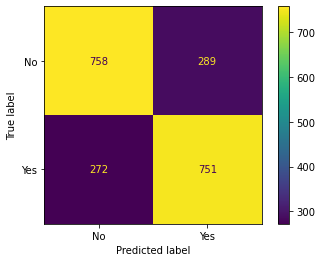

In [28]:
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
plot_confusion_matrix(clf, X_test, y_test) 
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test)) 

In [30]:
#Downsampling

data_down = pd.concat([X, y], axis = 1)

category_1 = data_down[data_down['churn'] == 'Yes']
category_0 = data_down[data_down['churn'] == 'No']

category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

data_down = pd.concat([category_0, category_1], axis=0)
data_down = data_down.sample(frac=1)

(1869, 5)
(1869, 5)


In [32]:
data_down['churn'].value_counts()

No     1869
Yes    1869
Name: churn, dtype: int64

In [33]:
X_d = data_down[['tenure', 'senior_citizen', 'monthly_charges', 'total_charges']]
y_d = data_down['churn']

In [34]:
X_train, X_test, y_train, y_test = train_test_split \
            (X_d, y_d, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
predictions = clf.predict(X_test)

Confusion matrix
[[276  94]
 [100 278]]
-------------------------------------------------------
Accuracy score
0.7406417112299465
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

          No       0.73      0.75      0.74       370
         Yes       0.75      0.74      0.74       378

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



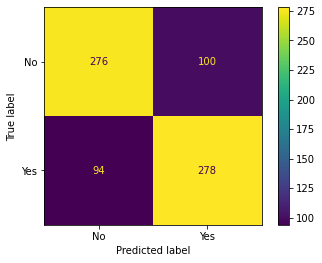

In [35]:
print('Confusion matrix')
print(confusion_matrix(predictions,y_test))
plot_confusion_matrix(clf, X_test, y_test) 
print('-------------------------------------------------------')
# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(predictions,y_test))
print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(predictions,y_test))